In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [44]:
small_arr = np.array([0, 0, 100, 0, 0])
small_arr_padded = np.pad(small_arr, 1, mode="reflect")
print(f"small_arr: {small_arr}")

mini_kernel = np.array([1, 1, 1])
# Normalize kernel so the last step of division isn't necessary
mini_kernel = mini_kernel / np.sum(mini_kernel)
print(mini_kernel)
print(small_arr)
win_view = np.lib.stride_tricks.sliding_window_view(small_arr_padded, mini_kernel.shape)

new_arr = np.zeros_like(small_arr)
for i, (pix, window_slice) in enumerate(zip(small_arr, win_view)):
    new_arr[i] = np.sum(mini_kernel*window_slice)
print(f"new_arr: {new_arr}")

small_arr: [  0   0 100   0   0]
[0.33333333 0.33333333 0.33333333]
[  0   0 100   0   0]
new_arr: [ 0 33 33 33  0]


In [11]:
def mean_blur(im, kernel = np.ones((3, 3))):
    im_padded = np.pad(im, 1, mode="reflect")

    # Normalize kernel so the last step of division isn't necessary
    kernel = kernel / np.sum(kernel)
    win_view = np.lib.stride_tricks.sliding_window_view(im_padded, kernel.shape, (0, 1))

    new_im = np.zeros_like(im)
    for i, (row, window_row) in enumerate(zip(im, win_view)):
        for j, (pix, window_slice) in enumerate(zip(row, window_row)):
            
            if i == 2 and j == 2:
                print(window_slice.shape)
            new_im[i, j] = np.sum(kernel*window_slice)
    return new_im

[[[190 201 203 199 200 198 200]
  [191 201 205 200 199 196 196]
  [188 201 205 201 200 195 195]
  [185 198 203 201 200 197 197]
  [184 197 201 199 199 198 199]
  [186 196 199 197 197 195 197]
  [188 197 199 194 195 193 196]]

 [[199 212 217 217 221 220 222]
  [200 213 219 218 220 218 220]
  [200 214 219 219 221 218 220]
  [198 212 220 219 222 220 222]
  [197 211 219 218 221 221 224]
  [199 211 215 216 220 219 223]
  [199 211 214 214 217 218 220]]

 [[190 201 203 199 200 198 200]
  [191 201 205 200 199 196 196]
  [188 201 205 201 200 195 195]
  [185 198 203 201 200 197 197]
  [184 197 201 199 199 198 199]
  [186 196 199 197 197 195 197]
  [188 197 199 194 195 193 196]]

 [[147 156 156 149 145 140 140]
  [150 159 158 150 146 139 136]
  [150 159 160 153 147 141 138]
  [150 159 160 155 150 145 141]
  [150 162 163 156 152 148 145]
  [154 163 163 157 155 149 148]
  [160 168 166 159 156 152 152]]

 [[190 201 203 199 200 198 200]
  [191 201 205 200 199 196 196]
  [188 201 205 201 200 195 195]


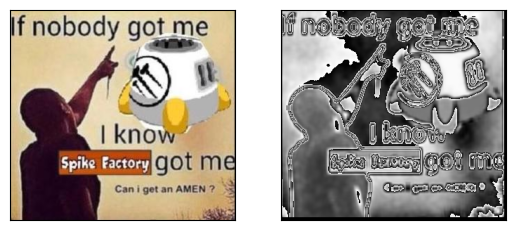

In [63]:
with Image.open("image0.jpg") as pic:
    # grayscale_image = pic.convert("L")
    im = np.asarray(pic)

fig, (plt1, plt2) = plt.subplots(1, 2)
plt1.axes.get_xaxis().set_visible(False)
plt1.axes.get_yaxis().set_visible(False)
plt2.axes.get_xaxis().set_visible(False)
plt2.axes.get_yaxis().set_visible(False)



plt1.imshow(im, cmap="grey")

kernel = np.ones((7,7))


# im = np.random.rand(100).reshape((10, 10))
# blur_im = mean_blur(im)




blur_im = mean_blur(im, kernel=kernel)
plt2.imshow(blur_im, cmap="grey")

In [ ]:
n = 10
x = y = np.arange(n)
horizontal_gradient, vertical_gradient = np.meshgrid(x, y)
im = np.mod(horizontal_gradient, 10) + np.mod(vertical_gradient, 10)

im = im * (255/np.max(im))

plt.imshow(im, cmap="grey")

ValueError: too many values to unpack (expected 2)